# Early Plant Disease Prediction System

In [141]:
# importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import cv2
import tensorflow as tf
from tensorflow.keras import models,layers
from sklearn.metrics import confusion_matrix
import pathlib
import random

In [2]:
IMG= 100          # width of image
BATCH= 64         # number of images for each batch
EPOCH= 80        # number of epochs

## Loading datasets

In [3]:
# Loading the training dataset

path=pathlib.Path("C:\\Users\\HP\\Desktop\\New Plant Diseases Dataset(Augmented)\\train") # Setting up path for training data

train_ds=tf.keras.preprocessing.image_dataset_from_directory(path,         # path of directory where the training data is located
                                                             seed=111,     # seed value for reproducible results
                                                   image_size=(IMG, IMG),  # size to resize images to after they are read
                                                   batch_size=BATCH)       # size of each batch

Found 70295 files belonging to 38 classes.


In [4]:
# Loading validation and testing dataset

temp_path=pathlib.Path("C:\\Users\\HP\\Desktop\\New Plant Diseases Dataset(Augmented)\\valid") # Setting up path for validation and testing data

test_ds, valid_ds=tf.keras.preprocessing.image_dataset_from_directory(temp_path, # path of directory where the data is located
                                                             seed=111,           # seed value for reproducible results
                                                   image_size=(IMG, IMG),        # size to resize images to after they are read
                                                   validation_split=0.5,         # fraction of data to reserve for validation
                                                   subset='both',                # to return a tuple of two datasets 
                                                   batch_size=BATCH)             # size of each batch

Found 17572 files belonging to 38 classes.
Using 8786 files for training.
Using 8786 files for validation.


In [5]:
# Each batch is containing 10 samples
print("Number of batches in training dataset   = ", len(train_ds))
print("Number of batches in validation dataset = ", len(valid_ds))
print("Number of batches in testing dataset    = ", len(test_ds))

Number of batches in training dataset   =  1099
Number of batches in validation dataset =  138
Number of batches in testing dataset    =  138


## Visualizing dataset distributions

In [22]:
class_names=dict(zip(train_ds.class_names, ['Apple__scab', 'Apple_black_rot','Apple_cedar_rust','Apple_healthy','Blueberry_healthy', 'Cherry_powdery_mildew','Cherry__healthy',
 'Corn__cercospora_leaf_spot','Corn_common_rust','Corn_northern_leaf_blight','Corn_healthy', 'Grape_black_rot','Grape__black_measles',
 'Grape__leaf_blight','Grape_healthy','Orange_haunglongbing','Peach_bacterial_spot','Peach_healthy','Pepper__bacterial_spot',
 'Pepper__healthy','Potato_early_blight','Potato_late_blight','Potato_healthy','Raspberry_healthy','Soybean__healthy',
 'Squash__Powdery_mildew','Strawberry_leaf_scorch','Strawberry_healthy','Tomato_bacterial_spot','Tomato__early_blight',
 'Tomato__late_blight','Tomato_leaf_mold','Tomato_septoria_leaf_spot','Tomato_spider_mites','Tomato__target_spot',
 'Tomato__YLC_Virus','Tomato_TMV','Tomato__healthy']))

In [23]:
# User-defined function to plot the distribution
def visualize_distribution(ds, x):
    
    freq={}
    for path in ds.file_paths:
        name=path[64:].split('\\')[0]
        freq[class_names[name]] = freq.get(class_names[name],0)+1

    plt.figure(figsize=(15,5))
    plt.bar(range(len(freq)), freq.values(), color="green")
    plt.xticks(range(len(freq)), freq.keys())
    for i in plt.gca().get_xticklabels():
        i.set_rotation(90)
    plt.xlabel("Classes")
    plt.ylabel("Frequency")
    plt.title(x+": Classwise frequency distribution")

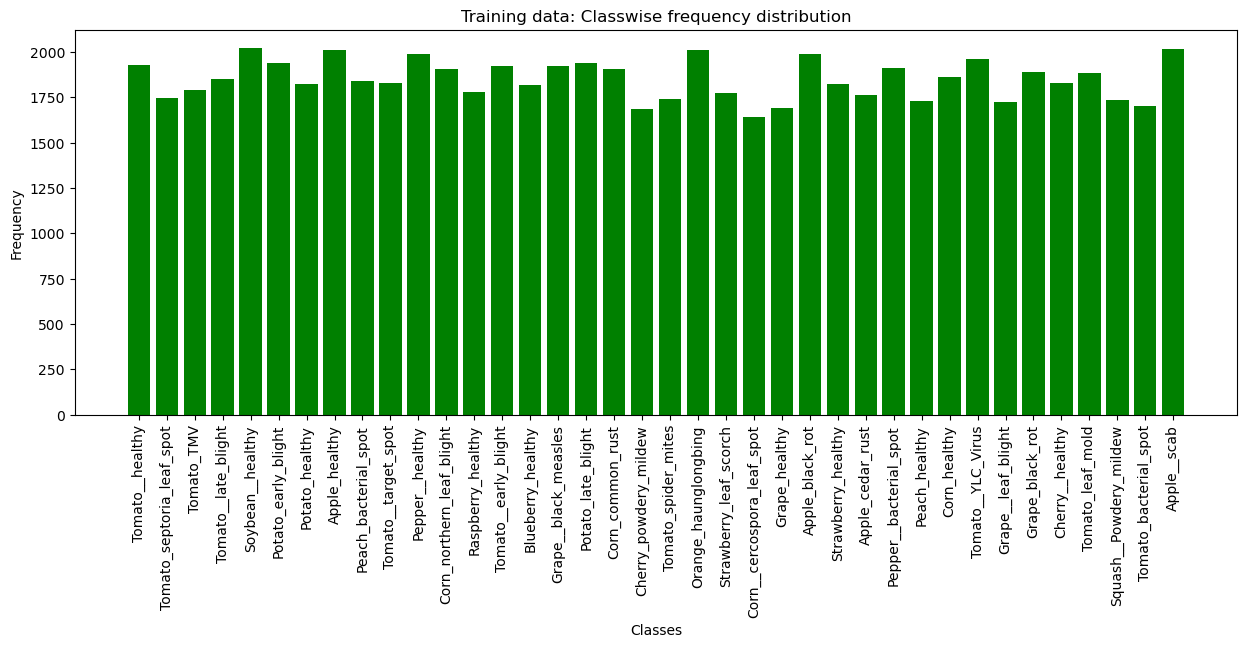

In [24]:
# Visualizing classwise frequency distribution for training data
visualize_distribution(train_ds,"Training data")

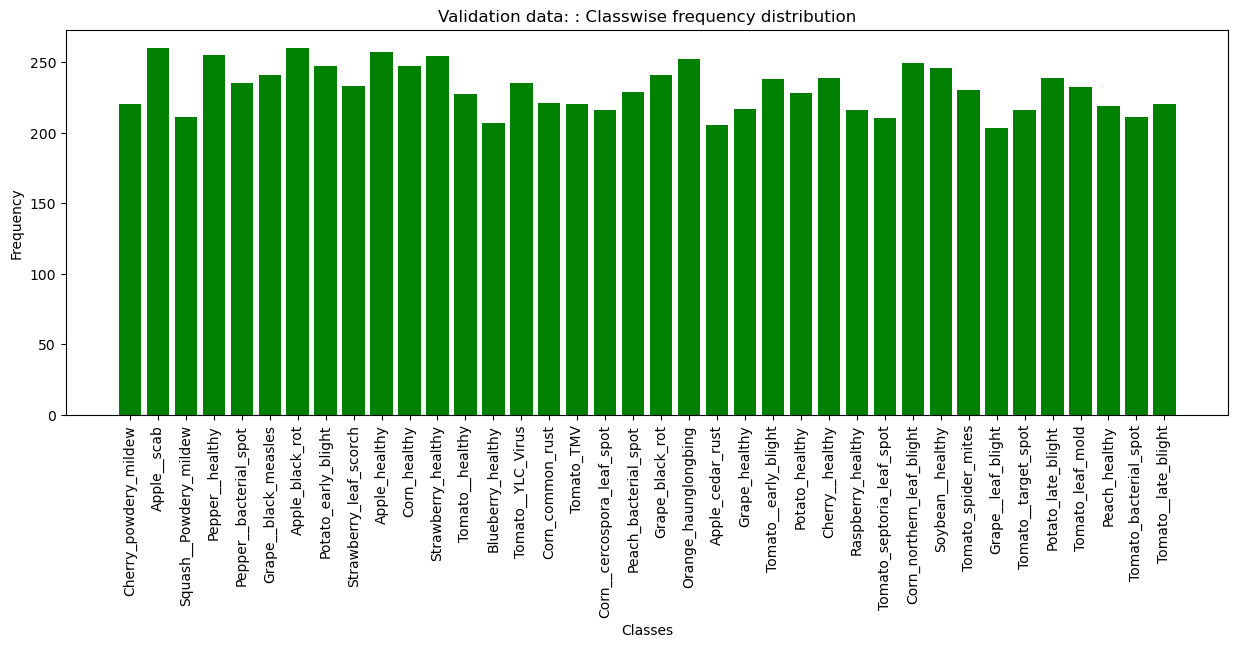

In [25]:
# Visualizing classwise frequency distribution for validation data
visualize_distribution(valid_ds, "Validation data: ")

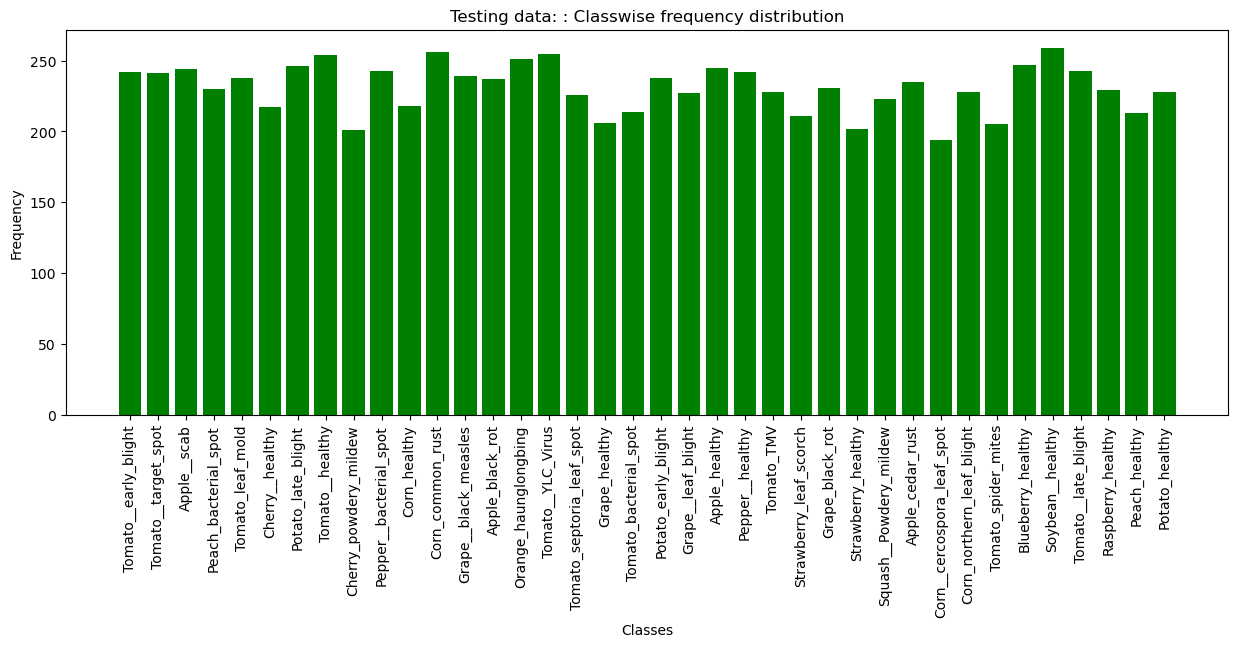

In [26]:
# Visualizing classwise frequency distribution for testing data
visualize_distribution(test_ds, "Testing data: ")

## Convolutional Neural Network(CNN) model

In [6]:
random.seed(111) # seed value for reproducible results 

# Architecture of Convolutional Neural Network(CNN) Model

model= models.Sequential([    

    layers.experimental.preprocessing.Rescaling(1.0/255),         # Re-scaling the input sample

    layers.Conv2D(64, kernel_size=(2,2), padding="same", activation="relu", kernel_regularizer=tf.keras.regularizers.l2(0.005),
                  input_shape=(IMG, IMG)), # Convolution Layer-1
    layers.MaxPooling2D(pool_size=(3,3)), # Pooling Layer-1
    layers.BatchNormalization(),

    layers.Conv2D(64, kernel_size=(3,3), activation="relu", kernel_regularizer=tf.keras.regularizers.l2(0.003)), # Convolution Layer-2
    layers.MaxPooling2D(pool_size=(3,3)), # Pooling Layer-2
    layers.BatchNormalization(),
    layers.Dropout(0.5),

    layers.Flatten(), # Flattening the input vector
    layers.Dense(100, activation="relu"), # Dense Layer
    layers.Dense(38, activation='softmax') # Output Layer
])

# Compiling the model
model.compile(
    optimizer="adam",       # adam optimizer
    loss="sparse_categorical_crossentropy", # loss function
    metrics=['accuracy', 'sparse_categorical_crossentropy']  # considering accuracy as a metric
)

In [52]:
# Displaying model's architecture
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 100, 100, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 100, 100, 64)      832       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 33, 33, 64)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 33, 33, 64)       256       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 31, 31, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 10, 10, 64)       0

In [7]:
# Training the model
# Took approximately 5 human hours to train the model
history= model.fit(
    train_ds,                 # training dataset
    epochs=EPOCH,             # number of epochs
    batch_size=BATCH,         # size of each batch
    validation_data=valid_ds  # validation dataset
)

Epoch 1/80
1099/1099 [==============================] - 216s 196ms/step - loss: 0.9663 - accuracy: 0.7618 - sparse_categorical_crossentropy: 0.8187 - val_loss: 0.8570 - val_accuracy: 0.7796 - val_sparse_categorical_crossentropy: 0.7368
Epoch 2/80
1099/1099 [==============================] - 216s 197ms/step - loss: 0.4100 - accuracy: 0.9040 - sparse_categorical_crossentropy: 0.3063 - val_loss: 0.4460 - val_accuracy: 0.8927 - val_sparse_categorical_crossentropy: 0.3524
Epoch 3/80
1099/1099 [==============================] - 217s 197ms/step - loss: 0.3082 - accuracy: 0.9283 - sparse_categorical_crossentropy: 0.2219 - val_loss: 1.3366 - val_accuracy: 0.7091 - val_sparse_categorical_crossentropy: 1.2543
Epoch 4/80
1099/1099 [==============================] - 218s 198ms/step - loss: 0.2659 - accuracy: 0.9396 - sparse_categorical_crossentropy: 0.1865 - val_loss: 0.4451 - val_accuracy: 0.8919 - val_sparse_categorical_crossentropy: 0.3667
Epoch 5/80
1099/1099 [==============================] - 

Epoch 36/80
1099/1099 [==============================] - 222s 202ms/step - loss: 0.0865 - accuracy: 0.9846 - sparse_categorical_crossentropy: 0.0458 - val_loss: 0.1734 - val_accuracy: 0.9646 - val_sparse_categorical_crossentropy: 0.1331
Epoch 37/80
1099/1099 [==============================] - 217s 198ms/step - loss: 0.0875 - accuracy: 0.9844 - sparse_categorical_crossentropy: 0.0466 - val_loss: 0.2190 - val_accuracy: 0.9532 - val_sparse_categorical_crossentropy: 0.1791
Epoch 38/80
1099/1099 [==============================] - 217s 198ms/step - loss: 0.0878 - accuracy: 0.9844 - sparse_categorical_crossentropy: 0.0466 - val_loss: 0.2178 - val_accuracy: 0.9561 - val_sparse_categorical_crossentropy: 0.1762
Epoch 39/80
1099/1099 [==============================] - 217s 198ms/step - loss: 0.0851 - accuracy: 0.9852 - sparse_categorical_crossentropy: 0.0440 - val_loss: 0.3175 - val_accuracy: 0.9309 - val_sparse_categorical_crossentropy: 0.2767
Epoch 40/80
1099/1099 [=============================

In [8]:
# Evaluating the performance on testing dataset
model.evaluate(test_ds)

138/138 [==============================] - 7s 52ms/step - loss: 0.3003 - accuracy: 0.9361 - sparse_categorical_crossentropy: 0.2618


[0.3002994954586029, 0.9361484050750732, 0.2618468403816223]

In [165]:
# saving the trained CNN model
model.save('model_final.h5')

In [18]:
# Storing performance values
loss=history.history['loss']
val_loss=history.history['val_loss']
accuracy=history.history['accuracy']
val_accuracy=history.history['val_accuracy']
entropy=history.history['sparse_categorical_crossentropy']
val_entropy=history.history['val_sparse_categorical_crossentropy']

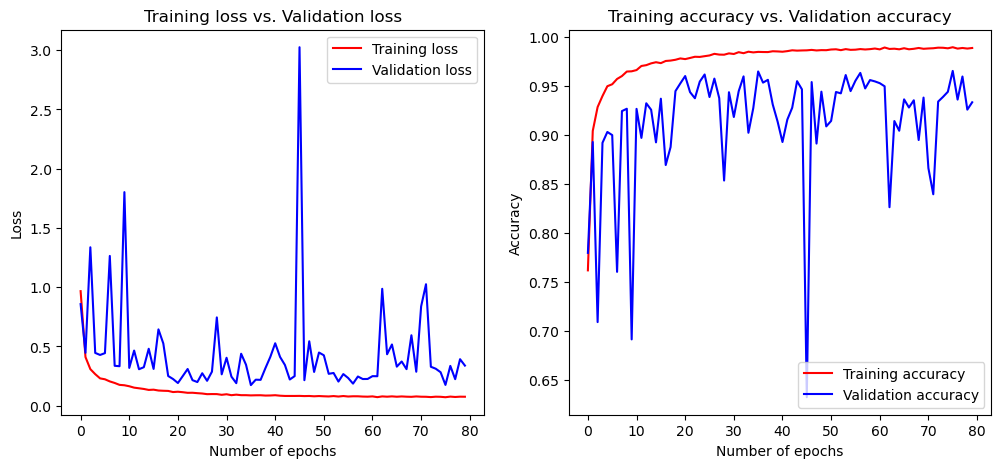

In [15]:
# Plot showing training and validation losses
plt.figure(figsize=(12,5))
plt.subplot(121)
plt.plot(range(len(loss)), loss, label='Training loss', color="red")
plt.plot(range(len(val_loss)), val_loss, label="Validation loss", color="blue")

plt.title("Training loss vs. Validation loss")
plt.xlabel("Number of epochs")
plt.ylabel("Loss")
plt.legend()

plt.subplot(122)
plt.plot(range(len(accuracy)), accuracy, label='Training accuracy', color="red")
plt.plot(range(len(val_accuracy)), val_accuracy, label="Validation accuracy", color="blue")
plt.title("Training accuracy vs. Validation accuracy")
plt.xlabel("Number of epochs")
plt.ylabel("Accuracy")
plt.legend(loc='lower right')

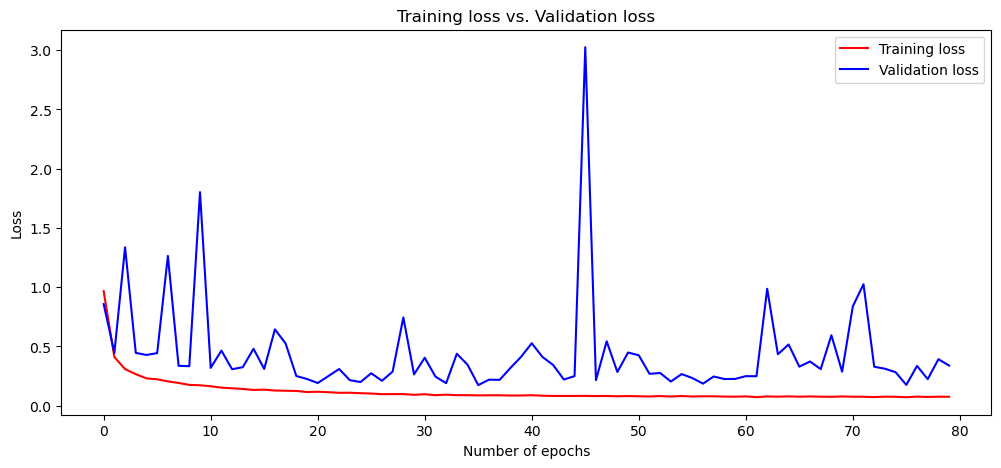

In [16]:
plt.figure(figsize=(12,5))
plt.plot(range(len(loss)), loss, label='Training loss', color="red")
plt.plot(range(len(val_loss)), val_loss, label="Validation loss", color="blue")
plt.title("Training loss vs. Validation loss")
plt.xlabel("Number of epochs")
plt.ylabel("Loss")
plt.legend()

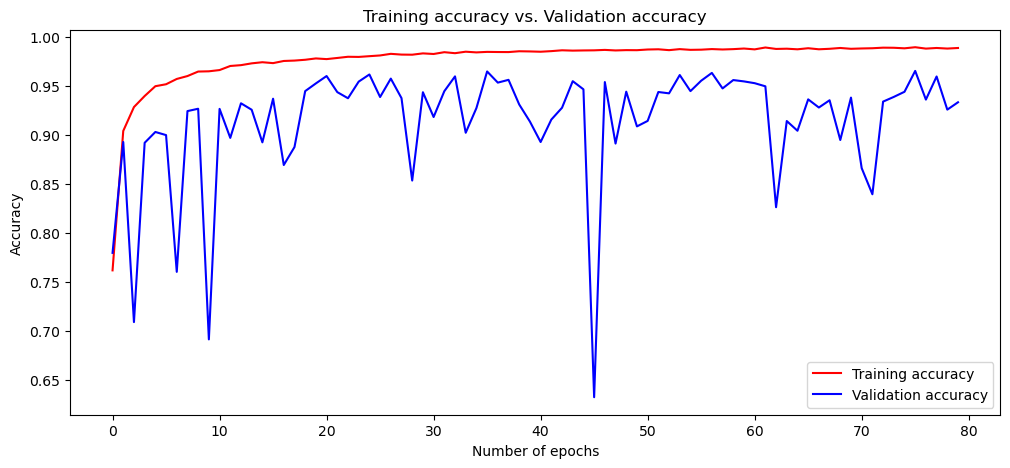

In [17]:
plt.figure(figsize=(12,5))
plt.plot(range(len(accuracy)), accuracy, label='Training accuracy', color="red")
plt.plot(range(len(val_accuracy)), val_accuracy, label="Validation accuracy", color="blue")
plt.title("Training accuracy vs. Validation accuracy")
plt.xlabel("Number of epochs")
plt.ylabel("Accuracy")
plt.legend(loc='lower right')

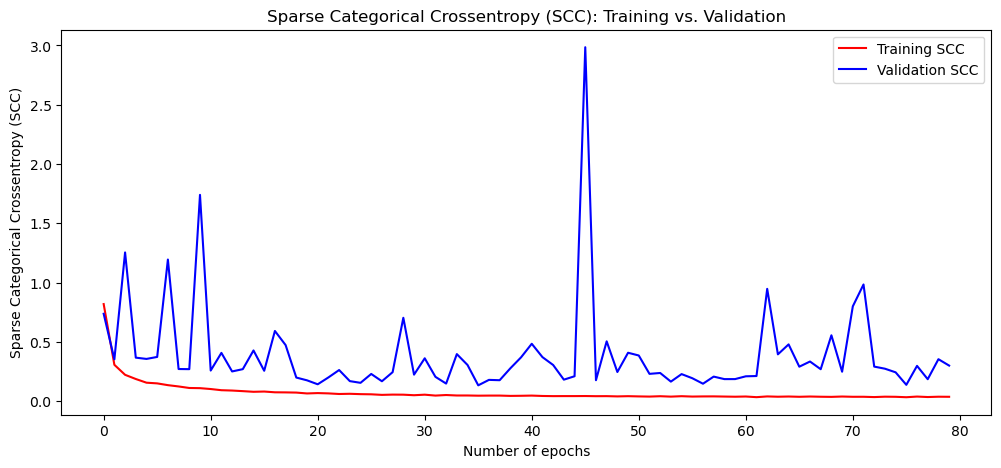

In [21]:
plt.figure(figsize=(12,5))
plt.plot(range(len(entropy)), entropy, label='Training SCC', color="red")
plt.plot(range(len(val_entropy)), val_entropy, label="Validation SCC", color="blue")
plt.title("Sparse Categorical Crossentropy (SCC): Training vs. Validation")
plt.xlabel("Number of epochs")
plt.ylabel("Sparse Categorical Crossentropy (SCC)")
plt.legend()

In [89]:
# predicting test data
y_pred=model.predict(test_ds)
y_pred

138/138 [==============================] - 7s 52ms/step


array([[7.2540070e-06, 8.5825785e-10, 1.0941025e-19, ..., 3.2798022e-23,
        1.7037422e-14, 1.9841713e-14],
       [1.1344582e-12, 1.6140827e-12, 5.2083697e-14, ..., 3.3364672e-10,
        1.4499585e-04, 1.4907747e-18],
       [4.4682636e-08, 1.0161459e-14, 9.8490091e-08, ..., 9.4348480e-11,
        7.5965314e-18, 3.2589907e-12],
       ...,
       [2.0992201e-12, 7.4031203e-09, 2.1355707e-16, ..., 1.2833331e-23,
        1.3603218e-18, 1.2047824e-19],
       [3.4588561e-04, 9.0337784e-07, 1.1335908e-16, ..., 2.7843132e-20,
        9.5189515e-14, 6.7962346e-14],
       [2.0814305e-22, 4.7663369e-35, 4.7143219e-24, ..., 1.9148082e-20,
        0.0000000e+00, 1.2451824e-19]], dtype=float32)

In [90]:
#Convert prediction probabilities into integers
y_preds = y_pred.argmax(axis=1)

In [91]:
y_preds

array([27, 32, 15, ..., 12, 27, 10], dtype=int64)

In [136]:
# calculating true_labels and predicted_labels
y_true=[]
y_pred=[]

for batch,label in test_ds:
    for i in range(BATCH):
        try:
            y_true.append(tf.get_static_value(label[i]))
        except:
            pass
    proba=model.predict(batch)
    y_pred.extend(proba.argmax(axis=1))

1/1 [==============================] - 0s 127ms/step


In [143]:
# calculating confusion matrix
conf_matrix= confusion_matrix(y_true, y_pred)

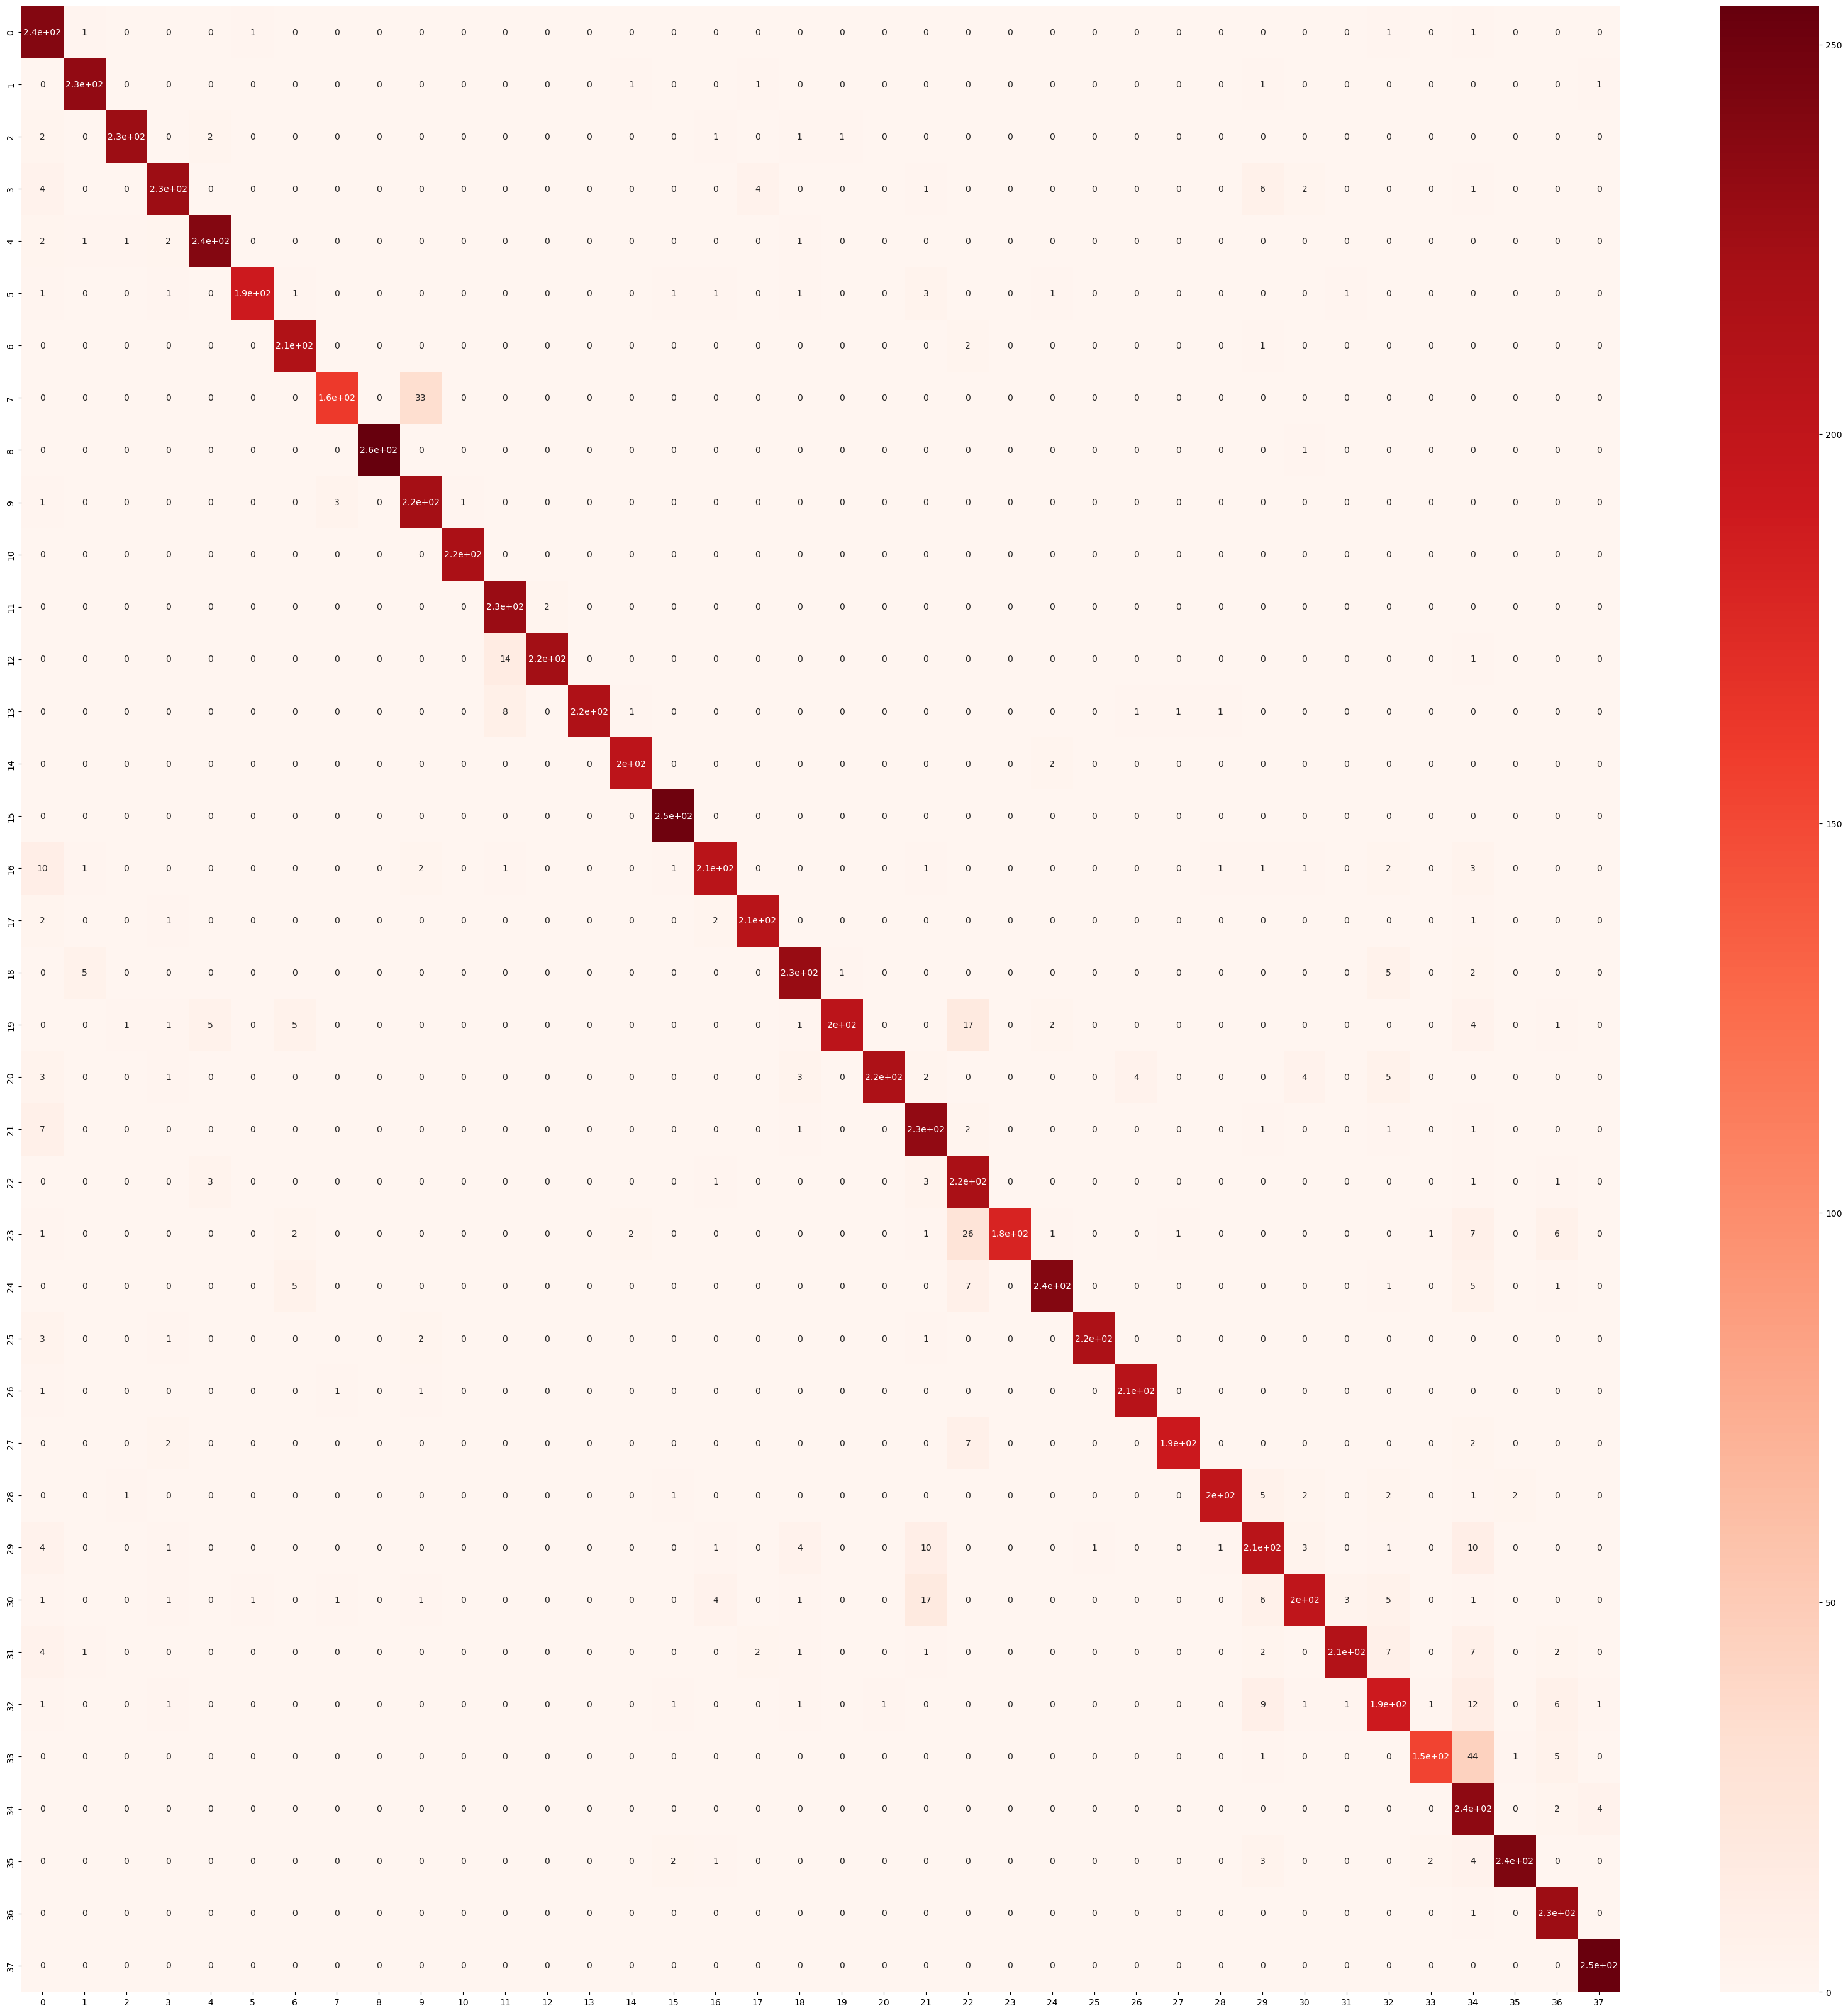

In [164]:
# displaying heatmap for correlation matrix
plt.figure(figsize=(41,41))
sns.heatmap(conf_matrix, annot=True, cmap="Reds")
plt.savefig("confusion_10.png")

In [106]:
# class names
class_names= ['Apple__scab', 'Apple_black_rot','Apple_cedar_rust','Apple_healthy','Blueberry_healthy', 'Cherry_powdery_mildew','Cherry__healthy',
 'Corn__cercospora_leaf_spot','Corn_common_rust','Corn_northern_leaf_blight','Corn_healthy', 'Grape_black_rot','Grape__black_measles',
 'Grape__leaf_blight','Grape_healthy','Orange_haunglongbing','Peach_bacterial_spot','Peach_healthy','Pepper__bacterial_spot',
 'Pepper__healthy','Potato_early_blight','Potato_late_blight','Potato_healthy','Raspberry_healthy','Soybean__healthy',
 'Squash__Powdery_mildew','Strawberry_leaf_scorch','Strawberry_healthy','Tomato_bacterial_spot','Tomato__early_blight',
 'Tomato__late_blight','Tomato_leaf_mold','Tomato_septoria_leaf_spot','Tomato_spider_mites','Tomato__target_spot',
 'Tomato__YLC_Virus','Tomato_TMV','Tomato__healthy']

In [107]:
# loading the saved model
model= tf.keras.models.load_model("model_final.h5")

In [179]:
# testing on sample images
for i in ['test1.jpg', 'test2.jpg', 'test3.jpg']:
    test_image= plt.imread(i)    # reading image to test
    resized_test_image= cv2.resize(test_image,(100,100))    # resizing the image
    img= np.expand_dims(resized_test_image,axis=0)    # adjusting shape of the image for model's input
    predicted= model.predict(img)    # generating predictions
    print("\nPrediction: ",class_names[np.argmax(predicted[0])],"\n\n\n") # mapping predicted value to it's name

1/1 [==============================] - 0s 48ms/step

Prediction:  Apple__scab 



1/1 [==============================] - 0s 78ms/step

Prediction:  Tomato_leaf_mold 



1/1 [==============================] - 0s 77ms/step

Prediction:  Grape_black_rot 





All predictions generated are accurate and correct.

## END
# ________________________________________________________________